This dataset will attempt to answer the following questions:

1. Which companies pay the highest salaries?
2. Do men earn more than women in the tech industry?
3. Is there a correlation between education and salary?
4. Is there a correlation between years of experience and salary?
5. Is there a correlation between years at a company and salary?
6. Is there a correlation between race and salary?
7. Where are the tech jobs located?

salary -> totalyearlycompensation

In [36]:
# import required libraries for performing EDA and data cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# q: how to disable warnings?
# a: use warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')


In [37]:
# import Levels_Fyi_Salary_Data.csv file

df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [38]:
# print all the columns in the dataset
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [40]:
df.shape

(62642, 29)

In [41]:
# select rows which has title as 'Data Scientist' and 'Data Engineer' and store it in a new dataframe
new_df = df[(df['title'] == 'Data Scientist') | (df['title'] == 'Data Engineer')]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 419 to 62623
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                2578 non-null   object 
 1   company                  2578 non-null   object 
 2   level                    2572 non-null   object 
 3   title                    2578 non-null   object 
 4   totalyearlycompensation  2578 non-null   int64  
 5   location                 2578 non-null   object 
 6   yearsofexperience        2578 non-null   float64
 7   yearsatcompany           2578 non-null   float64
 8   tag                      2573 non-null   object 
 9   basesalary               2578 non-null   float64
 10  stockgrantvalue          2578 non-null   float64
 11  bonus                    2578 non-null   float64
 12  gender                   1740 non-null   object 
 13  otherdetails             1815 non-null   object 
 14  cityid               

In [42]:
new_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [43]:
# drop columns which are not required for analysis from the new dataframe
todo = ['Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']
to_be_drop = ['timestamp','title','level','tag','otherdetails','cityid','dmaid','rowNumber']
to_be_drop = to_be_drop + todo
new_df.drop(to_be_drop, axis=1, inplace=True)

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 419 to 62623
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  2578 non-null   object 
 1   totalyearlycompensation  2578 non-null   int64  
 2   location                 2578 non-null   object 
 3   yearsofexperience        2578 non-null   float64
 4   yearsatcompany           2578 non-null   float64
 5   basesalary               2578 non-null   float64
 6   stockgrantvalue          2578 non-null   float64
 7   bonus                    2578 non-null   float64
 8   gender                   1740 non-null   object 
 9   Masters_Degree           2578 non-null   int64  
 10  Bachelors_Degree         2578 non-null   int64  
 11  Doctorate_Degree         2578 non-null   int64  
 12  Highschool               2578 non-null   int64  
 13  Some_College             2578 non-null   int64  
dtypes: float64(5), int64(

In [45]:
# drop rows which has null values
new_df.dropna(inplace=True)

In [46]:
new_df.head()

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
419,LinkedIn,233000,"San Francisco, CA",4.0,0.0,162000.0,220000.0,10000.0,Male,0,0,0,0,0
440,Microsoft,218000,"Seattle, WA",11.0,11.0,165000.0,28000.0,23000.0,Male,0,0,0,0,0
444,ebay,180000,"San Jose, CA",10.0,5.0,0.0,0.0,0.0,Female,0,0,0,0,0
454,Twitter,500000,"San Francisco, CA",4.0,4.0,200000.0,280000.0,20000.0,Male,0,0,0,0,0
495,Facebook,370000,"Seattle, WA",8.0,3.0,190000.0,140000.0,40000.0,Male,0,0,0,0,0


In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 419 to 62529
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  1740 non-null   object 
 1   totalyearlycompensation  1740 non-null   int64  
 2   location                 1740 non-null   object 
 3   yearsofexperience        1740 non-null   float64
 4   yearsatcompany           1740 non-null   float64
 5   basesalary               1740 non-null   float64
 6   stockgrantvalue          1740 non-null   float64
 7   bonus                    1740 non-null   float64
 8   gender                   1740 non-null   object 
 9   Masters_Degree           1740 non-null   int64  
 10  Bachelors_Degree         1740 non-null   int64  
 11  Doctorate_Degree         1740 non-null   int64  
 12  Highschool               1740 non-null   int64  
 13  Some_College             1740 non-null   int64  
dtypes: float64(5), int64(

In [48]:
# #Encoding categorical data values
# from sklearn.preprocessing import LabelEncoder

# to_be_encoded = ['company','location','gender']

# labelencoder_Y = LabelEncoder()
# for i in to_be_encoded:
#     new_df[i] = labelencoder_Y.fit_transform(new_df[i])
    
# # decode the encoded values
# new_df['company'] = labelencoder_Y.inverse_transform(new_df['company'])
# new_df['location'] = labelencoder_Y.inverse_transform(new_df['location'])
# new_df['gender'] = labelencoder_Y.inverse_transform(new_df['gender'])

# new_df.head()

<AxesSubplot:>

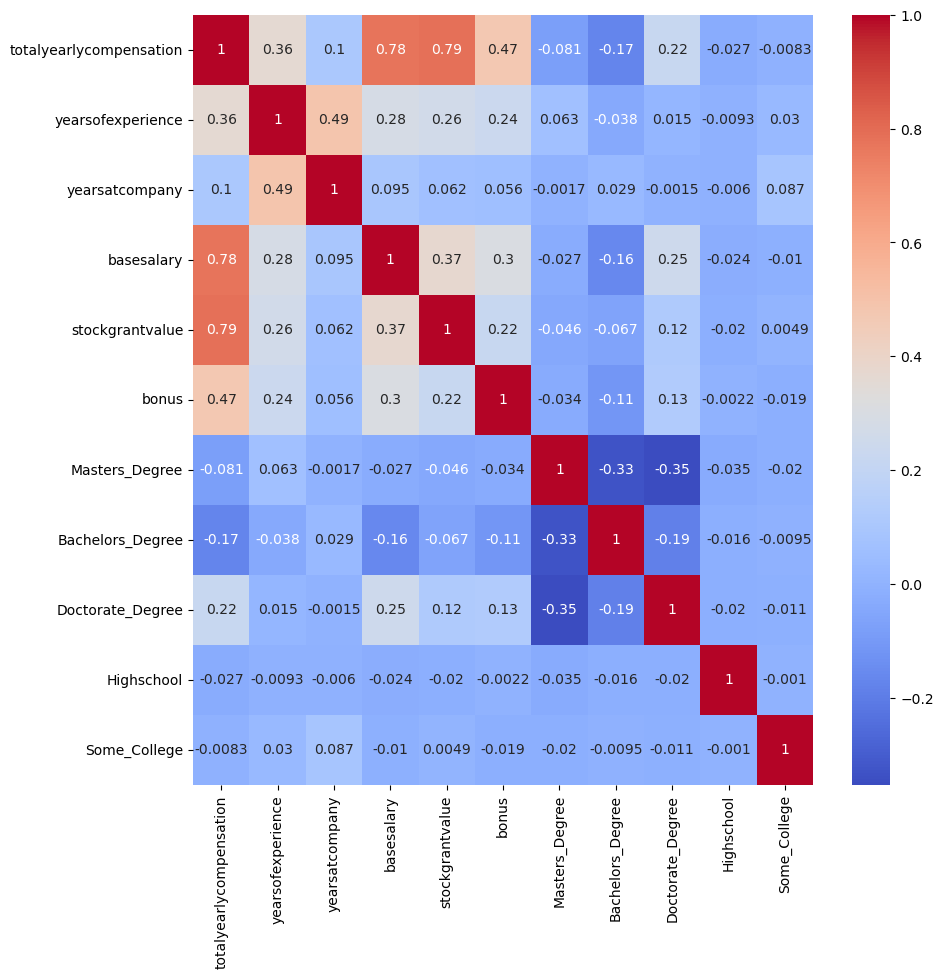

In [49]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')

In [50]:
# drop basesalary column and stockgrantvalue column and store it in a new dataframe
new_df2 = new_df.drop(['basesalary','stockgrantvalue','bonus'], axis=1)

<AxesSubplot:>

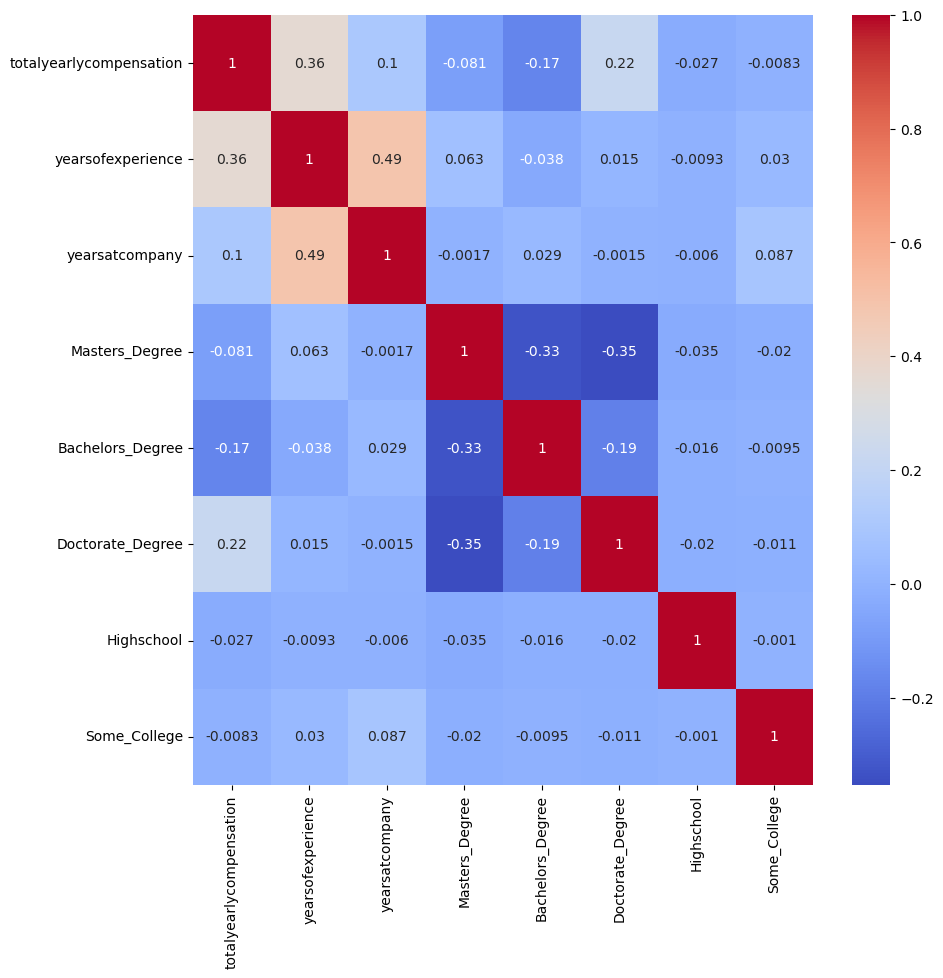

In [51]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(new_df2.corr(), annot=True, cmap='coolwarm')

# How long does a typical tech worker stay at a company?

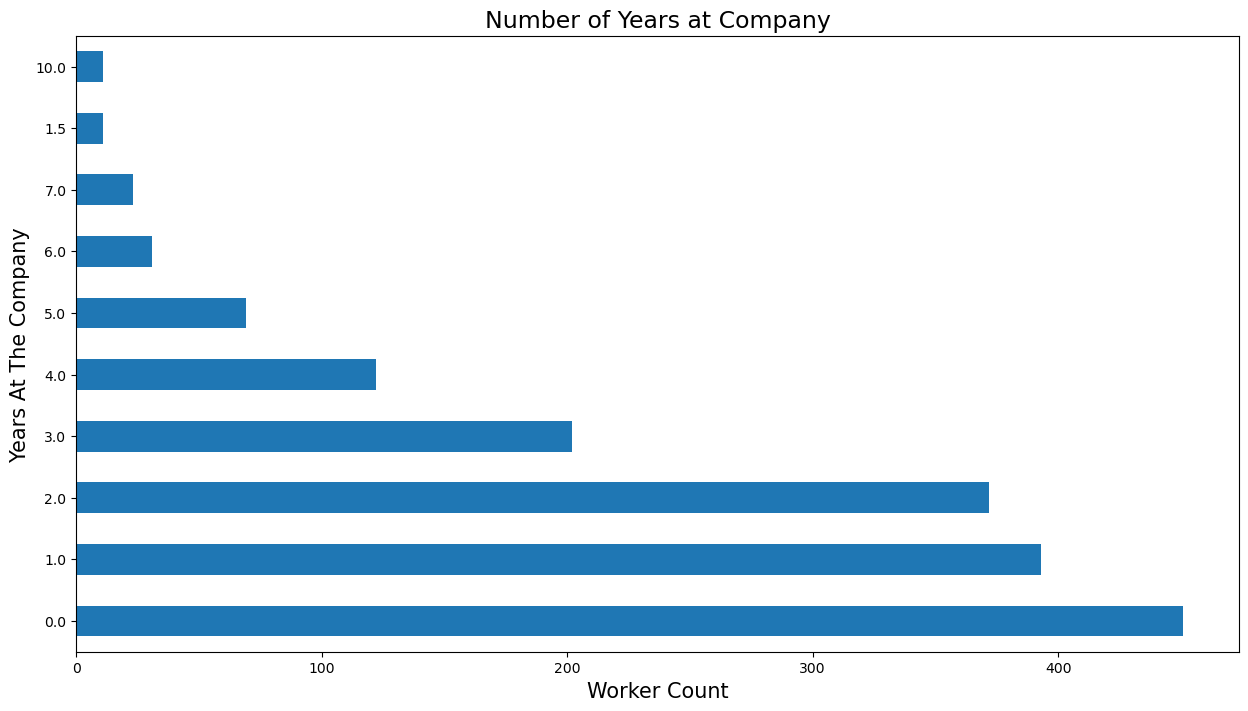

In [52]:
number_of_years_at_company = new_df['yearsatcompany'].value_counts(ascending = False)\
                                                            .head(10)\
                                                            .plot.barh(figsize = (15,8));
plt.title('Number of Years at Company', size=17)
plt.xlabel('Worker Count', size = 15)
plt.ylabel('Years At The Company', size = 15)
plt.show(); 

# top 10 locations of data science jobs

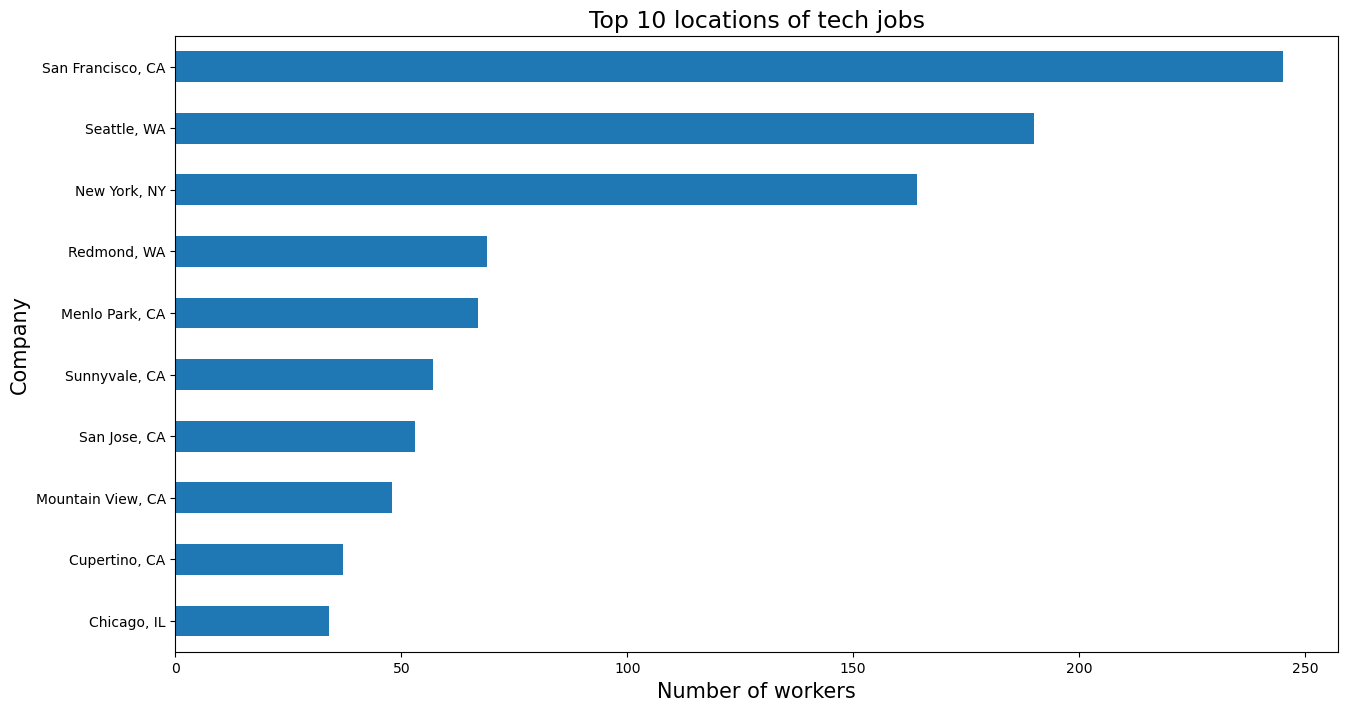

In [53]:
location = new_df['location'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (15,8))
plt.title('Top 10 locations of tech jobs', size=17)
plt.xlabel('Number of workers', size = 15)
plt.ylabel('Company', size = 15)
plt.show();

In [54]:
# print the unique values in the 'location' column
new_df['location'].unique()

array(['San Francisco, CA', 'Seattle, WA', 'San Jose, CA', 'Bellevue, WA',
       'Kirkland, WA', 'Los Gatos, CA', 'Palo Alto, CA', 'New York, NY',
       'Sunnyvale, CA', 'Menlo Park, CA', 'Albuquerque, NM', 'Cary, NC',
       'Redmond, WA', 'Atlanta, GA', 'Cambridge, MA', 'Bentonville, AR',
       'Irvine, CA', 'Austin, TX', 'Cupertino, CA', 'Los Angeles, CA',
       'Washington, DC', 'Toronto, ON, Canada', 'Boston, MA',
       'Broomfield, CO', 'Mountain View, CA', 'Vancouver, BC, Canada',
       'Hillsboro, OR', 'Santa Clara, CA', 'Gurgaon, HR, India',
       'Plano, TX', 'Columbus, OH', 'Colorado Springs, CO',
       'Portland, OR', 'Berkeley, CA', 'Morrisville, NC', 'Boulder, CO',
       'Richmond, VA', 'Raleigh, NC', 'Reston, VA', 'Wilmington, DE',
       'San Diego, CA', 'Redwood City, CA', 'Pittsburgh, PA',
       'Dubai, DU, United Arab Emirates', 'Heidelberg, BW, Germany',
       'Walnut Creek, CA', 'Chicago, IL', 'Farmington, UT',
       'Wuppertal, NW, Germany', 'Fremont, 

In [55]:
# print the number of rows per unique value in the 'location' column
print(new_df['location'].value_counts())

San Francisco, CA        245
Seattle, WA              190
New York, NY             164
Redmond, WA               69
Menlo Park, CA            67
                        ... 
Sao Paulo, SP, Brazil      1
Alexandria, VA             1
Gainesville, FL            1
Calgary, AB, Canada        1
Roseland, NJ               1
Name: location, Length: 197, dtype: int64


In [ ]:
# import geopandas as gpd
# import pandas as pd